In [3]:
# Let's read in the data file
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")
# Summarize the numeric attributes
#data

In [4]:
# 3 Test for presence any missing attribute/target values and impute as necessary.
# Are there any columns with missing values?
data.isnull().values.any()

#does not have any missing values


False

In [5]:
# 4 Encode all categoric attributes (e.g. label encoding or ordinal encoding, etc.)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
graph1 = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, data.shape[1]):
    if data.dtypes[i]=='object' or data.dtypes[i]=='bool':
        graph1[data.columns[i]] = le.fit_transform(data[data.columns[i]])



print("-=========================")
print(data)
print("-=========================")
graph1
#taken from slides


-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


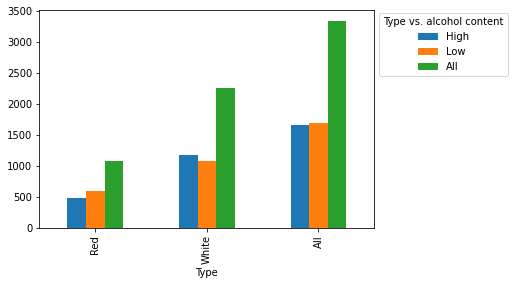

In [6]:
#Create contingency tables (cross tabulations) for:
#a. Type vs. alcohol content
#b. Type vs. Sugar content

# 2. Create a contingency table of Type vs. alcohol content
# Make a two-Way contingency table for categorical attributes 
tableTypeAlc = pd.crosstab(data.Type, data.Alcohol_flag, margins=True)

import matplotlib.pyplot as plt
# $workclass will be rows, $sex will be columns
table1 = pd.crosstab(data.Type, data.Alcohol_flag, margins=True)

ax = table1.plot(kind="bar", stacked=False)
ax.legend(title='Type vs. alcohol content', bbox_to_anchor=(1, 1.01), loc='upper left') #legend and dimensions of graph



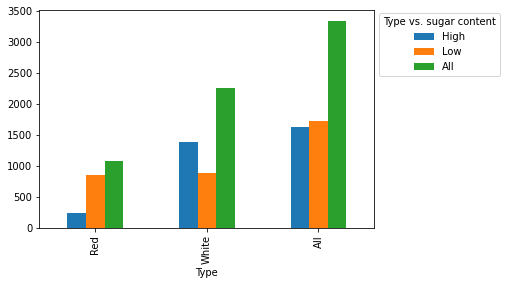

In [7]:
#b. Type vs. Sugar content

# 2. Create a contingency table of Type vs. sugar content
# Make a two-Way contingency table for categorical attributes 
tableTypeSugar = pd.crosstab(data.Type, data.Sugar_flag, margins=True)

import matplotlib.pyplot as plt
# $workclass will be rows, $sex will be columns
table2 = pd.crosstab(data.Type, data.Sugar_flag, margins=True)

ax = table2.plot(kind="bar", stacked=False)
ax.legend(title='Type vs. sugar content', bbox_to_anchor=(1, 1.01), loc='upper left') #legend and dimensions of graph


In [8]:
#7 prior probability of red and white
#determine how many red and white there are
data['Type'].value_counts()
#white = 2260/3345
#red = 1085/3345

White    2260
Red      1085
Name: Type, dtype: int64

In [9]:
#probability of type red and the probability of type white
probRed=1085/3345
probWhite=2260/3345

In [10]:
# b. The probability of high and low alcohol content
#determine the low and high alc percentages
data['Alcohol_flag'].value_counts()

Low     1684
High    1661
Name: Alcohol_flag, dtype: int64

In [11]:
#probability of high alcohol content
probHighAlc= 1661/3345
#probability of low alcohol content
probLowAlc= 1684/3345

In [12]:
# c. The probability of high and low sugar content
#determine the low and high sugar percentages
data['Sugar_flag'].value_counts()

Low     1726
High    1619
Name: Sugar_flag, dtype: int64

In [13]:
#probability of high sugar content
probHighSugar= 1619/3345
#probability of low sugar content
probLowSugar= 1726/3345

In [36]:
# d. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red)
#so the alc has to be high or the value red

condProbAlcHighAndRed = ((485/1661)*probRed)/probHighAlc
condProbAlcHighAndRed

0.19073579852413317

In [37]:
#The conditional probabilities p(Alcohol_flag = Low ∣ Type = Red)
condProbAlcLowAndRed = ((600/1684)*probRed)/probLowAlc
condProbAlcLowAndRed

0.22956031617966502

In [38]:
#e The conditional probabilities p(Sugar_flag = High ∣ Type = Red) 
condProbSugarHighAndRed = ((237/1619)*probRed)/probHighAlc
condProbSugarHighAndRed


0.09562283226837834

In [39]:
#e The conditional probabilities p(Sugar_flag = Low ∣ Type = Red) 
condProbSugarLowAndRed = ((848/1726)*probRed)/probLowAlc
condProbSugarLowAndRed

0.3165502872100033

Create the NB Classifier

In [18]:
# import library
from sklearn import preprocessing

# label encoding
le = preprocessing.LabelEncoder()

# save the encoded dataframe
encoded_DF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, data.shape[1]):
    if data.dtypes[i]=='object' or data.dtypes[i]=='bool':
        encoded_DF[data.columns[i]] = le.fit_transform(data[data.columns[i]])
#printing data
print(data)
#printing encoded df
print(encoded_DF)

       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
0        0             0           0
1        0             0           1
2        0             1           0
3        0             0           1
4        0             1           1
...    ...           ...         ...
3340     1             0           0
3341     1             0           1
3342     1             0           1
3343     1             0           1
3344     1             0           1

[3345 rows x 3 columns]


In [28]:
#1st test
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_DF.iloc[:,1:4]
y = encoded_DF.iloc[:,0:1]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=42, shuffle=True, test_size=0.90, stratify=y)
#90 to 10 data



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


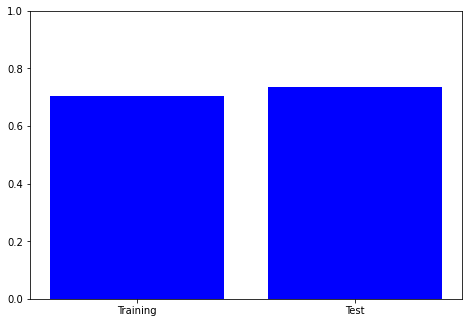

In [29]:
#1st test graph
NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
training = NBmodel.score(X_train, y_train)
testing = NBmodel.score(X_test, y_test)
scores = [training , testing]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, scores, color="blue")
ax.set_ylim(0, 1)
plt.show()

In [31]:
#2nd test

# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_DF.iloc[:,1:4]
y = encoded_DF.iloc[:,0:1]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=42, shuffle=True, test_size=0.70, stratify=y)
#70 to 30 data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


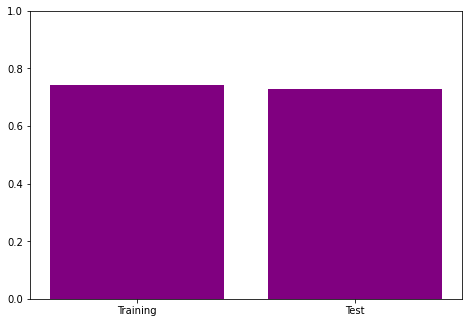

In [32]:
#2st test graph
NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
training = NBmodel.score(X_train, y_train)
testing = NBmodel.score(X_test, y_test)
scores = [training , testing]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, scores, color="purple")
ax.set_ylim(0, 1)
plt.show()

In [33]:
#3nd test

# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_DF.iloc[:,1:4]
y = encoded_DF.iloc[:,0:1]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=42, shuffle=True, test_size=0.50, stratify=y)
#50 to 50 data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


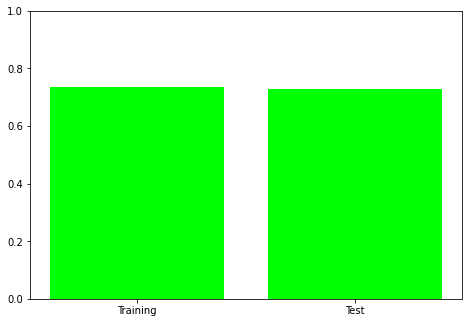

In [35]:
#3st test graph
NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
training = NBmodel.score(X_train, y_train)
testing = NBmodel.score(X_test, y_test)
scores = [training , testing]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, scores, color="lime")
ax.set_ylim(0, 1)
plt.show()